In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
%matplot inline

UsageError: Line magic function `%matplot` not found.


In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


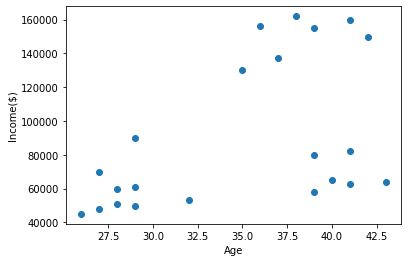

In [4]:
plt.scatter(df.Age, df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [6]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["Age","Income($)"]])
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [8]:
df["cluster"] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [9]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


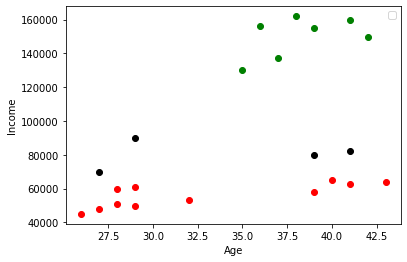

In [16]:
plt.scatter(df1.Age, df1["Income($)"], color="green")
plt.scatter(df2.Age, df2["Income($)"], color="red")
plt.scatter(df3.Age, df3["Income($)"], color="black")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [19]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df["Age"] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


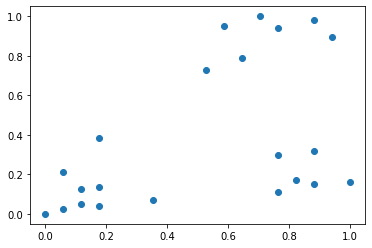

In [20]:
plt.scatter(df.Age,df['Income($)'])

In [21]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["Age","Income($)"]])
y_pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [22]:
df["cluster"] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


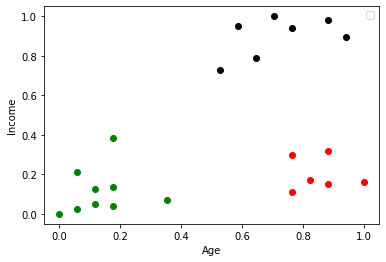

In [24]:
plt.scatter(df1.Age, df1["Income($)"], color="green")
plt.scatter(df2.Age, df2["Income($)"], color="red")
plt.scatter(df3.Age, df3["Income($)"], color="black")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [25]:
# when there's more feature, it's not easy to find K value so we use Elbow plot

In [26]:
sse = []

k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)

In [27]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530933,
 0.3491047094419564,
 0.26217927623452125,
 0.22020960864009395,
 0.16858512236029757,
 0.13265419827245162,
 0.10383752586603559]

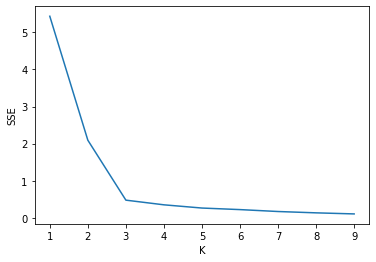

In [28]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng,sse)